In [1]:
# Imports
import matplotlib.pyplot as plt

import heapq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from math import floor, ceil, inf
from dataclasses import asdict

from edinburgh_challenge.constants import police_stations, police_stations_dict
from edinburgh_challenge.utility import generate_early_shift_distributions
from edinburgh_challenge.models import NaiveModel, GreedyModel, EnhancedModel, SimplifiedModelNotBest, SimplifiedModel
from edinburgh_challenge.simulation import *
from edinburgh_challenge.processing import calculate_metric, calculate_simulation_performance

In [2]:
source = "./data.xlsx"
data = pd.read_excel(source)
data["Time"] = (data["Day"]-1)*24 + data["Hour"]
data.columns = [x.lower() for x in data.columns]

In [3]:
no_of_officers = 15+25+40
print(no_of_officers)

# increase early decrease night
# incerase early to 22, decrease night to 33
n_early = 20
n_day = 25
n_night = 35
print(n_early + n_day + n_night)

80
80


## Base Case

In [10]:
shift_distribution = {
    'Early': {'Station_1': 7, 'Station_2': 6, 'Station_3':7}, # 25
    'Day': {'Station_1': 8, 'Station_2': 8, 'Station_3': 9}, #25
    'Night': {'Station_1': 12, 'Station_2': 11, 'Station_3': 12} # 35
}

ps_coords = [ (p.x, p.y) for p in 
                [police_stations.one, 
                 police_stations.two, 
                 police_stations.three]]

greedy_model = GreedyModel(shift_distribution, police_stations_dict)
simulation = SimulationWithMaxUtilisation(data, ps_coords, shift_distribution, 
                        verbose=0)

In [11]:
simulation.run(greedy_model)
print(calculate_simulation_performance(simulation.analyze_simulation_results(), verbose=True))
print(simulation.analyze_simulation_results())

incident_within_threshold=1.0
officer_utilisation=0.9611016573711841
unresolved_incidents=0.0
0.9922203314742368
{'Completion Percentages': {'Immediate': 100.0, 'Prompt': 100.0, 'Standard': 100.0}, 'Mean Response Times': {'Immediate': 88.3519587454965, 'Prompt': 84.64411461532423, 'Standard': 88.32753727036726}, 'Mean Deployment Times': {'Immediate': 1.5403225806451613, 'Prompt': 1.5061196105702366, 'Standard': 1.4796755725190842}, 'Threshold Compliance': {'Immediate': 100.0, 'Prompt': 100.0, 'Standard': 100.0}, 'Mean Officer Hours': 54.7827944701575, 'Unresolved Incident Percentage': 0.0}


In [12]:
simulation.analyze_simulation_results()

{'Completion Percentages': {'Immediate': 100.0,
  'Prompt': 100.0,
  'Standard': 100.0},
 'Mean Response Times': {'Immediate': 88.3519587454965,
  'Prompt': 84.64411461532423,
  'Standard': 88.32753727036726},
 'Mean Deployment Times': {'Immediate': 1.5403225806451613,
  'Prompt': 1.5061196105702366,
  'Standard': 1.4796755725190842},
 'Threshold Compliance': {'Immediate': 100.0,
  'Prompt': 100.0,
  'Standard': 100.0},
 'Mean Officer Hours': 54.7827944701575,
 'Unresolved Incident Percentage': 0.0}

### Best Early Shift 

In [33]:
early_shift_dist = generate_early_shift_distributions(n_early)
simulation_results = []
for dist in early_shift_dist:
    new_shift_distribution = dict(shift_distribution)
    new_shift_distribution["Early"] = {'Station_1': dist[0], 'Station_2':dist[1], 'Station_3':dist[2]}
    greedy_model = GreedyModel(new_shift_distribution, police_stations_dict)
    simulation = SimulationWithMaxUtilisation(data, ps_coords, new_shift_distribution, verbose=1)
    simulation.run(greedy_model)
    res = simulation.analyze_simulation_results()
    result = calculate_simulation_performance(res)
    simulation_results.append((new_shift_distribution, result))

In [34]:
sorted_early_simulations = sorted(simulation_results, reverse=True, key=lambda x: x[1])
sorted_early_simulations[0:4]

[({'Early': {'Station_1': 0, 'Station_2': 9, 'Station_3': 16},
   'Day': {'Station_1': 8, 'Station_2': 8, 'Station_3': 9},
   'Night': {'Station_1': 12, 'Station_2': 11, 'Station_3': 12}},
  0.974988756144854),
 ({'Early': {'Station_1': 0, 'Station_2': 10, 'Station_3': 15},
   'Day': {'Station_1': 8, 'Station_2': 8, 'Station_3': 9},
   'Night': {'Station_1': 12, 'Station_2': 11, 'Station_3': 12}},
  0.9749860147553077),
 ({'Early': {'Station_1': 0, 'Station_2': 6, 'Station_3': 19},
   'Day': {'Station_1': 8, 'Station_2': 8, 'Station_3': 9},
   'Night': {'Station_1': 12, 'Station_2': 11, 'Station_3': 12}},
  0.9749742028097528),
 ({'Early': {'Station_1': 0, 'Station_2': 8, 'Station_3': 17},
   'Day': {'Station_1': 8, 'Station_2': 8, 'Station_3': 9},
   'Night': {'Station_1': 12, 'Station_2': 11, 'Station_3': 12}},
  0.9749724724097294)]

## Best Day Shift

In [35]:
shift_distribution = {
    'Early': sorted_early_simulations[0][0]["Early"],
    'Day': {'Station_1': 8, 'Station_2': 8, 'Station_3': 9},
    'Night': {'Station_1': 13, 'Station_2': 13, 'Station_3': 14}
}

In [36]:
early_shift_dist = generate_early_shift_distributions(n_day)
simulation_results = []
for dist in early_shift_dist:
    
    new_shift_distribution = dict(shift_distribution)
    new_shift_distribution["Day"] = {'Station_1': dist[0], 'Station_2': dist[1], 'Station_3': dist[2]}
    
    greedy_model = GreedyModel(new_shift_distribution, police_stations_dict)
    
    simulation = SimulationWithMaxUtilisation(data, ps_coords, new_shift_distribution, verbose=1)
    simulation.run(greedy_model)
    
    res = simulation.analyze_simulation_results()
    result = calculate_simulation_performance(res)
    simulation_results.append((new_shift_distribution, result))

In [37]:
sorted_day_simulations = sorted(simulation_results, reverse=True, key=lambda x: x[1])
sorted_day_simulations[0:4]

[({'Early': {'Station_1': 0, 'Station_2': 9, 'Station_3': 16},
   'Day': {'Station_1': 2, 'Station_2': 13, 'Station_3': 10},
   'Night': {'Station_1': 13, 'Station_2': 13, 'Station_3': 14}},
  0.9590974108078765),
 ({'Early': {'Station_1': 0, 'Station_2': 9, 'Station_3': 16},
   'Day': {'Station_1': 2, 'Station_2': 19, 'Station_3': 4},
   'Night': {'Station_1': 13, 'Station_2': 13, 'Station_3': 14}},
  0.9590865533533555),
 ({'Early': {'Station_1': 0, 'Station_2': 9, 'Station_3': 16},
   'Day': {'Station_1': 2, 'Station_2': 14, 'Station_3': 9},
   'Night': {'Station_1': 13, 'Station_2': 13, 'Station_3': 14}},
  0.9590776100095308),
 ({'Early': {'Station_1': 0, 'Station_2': 9, 'Station_3': 16},
   'Day': {'Station_1': 2, 'Station_2': 15, 'Station_3': 8},
   'Night': {'Station_1': 13, 'Station_2': 13, 'Station_3': 14}},
  0.9590733018392992)]

## Best Night Shift

In [38]:
shift_distribution = {
    'Early': sorted_early_simulations[0][0]["Early"],
    'Day': sorted_day_simulations[0][0]["Day"],
    'Night': {'Station_1': 13, 'Station_2': 13, 'Station_3': 14}
}

In [39]:
early_shift_dist = generate_early_shift_distributions(n_night)
simulation_results = []
for dist in early_shift_dist:
    
    new_shift_distribution = dict(shift_distribution)
    new_shift_distribution["Night"] = {'Station_1': dist[0], 'Station_2': dist[1], 'Station_3': dist[2]}
    
    greedy_model = GreedyModel(new_shift_distribution, police_stations_dict)
    
    simulation = SimulationWithMaxUtilisation(data, ps_coords, new_shift_distribution, verbose=1)
    simulation.run(greedy_model)
    
    res = simulation.analyze_simulation_results()
    result = calculate_simulation_performance(res)
    simulation_results.append((new_shift_distribution, result))

KeyboardInterrupt: 

In [ ]:
sorted_night_simulations = sorted(simulation_results, reverse=True, key=lambda x: x[1])
sorted_night_simulations[0:4]

## With less number of people

In [126]:
shift_distribution = {
    'Early': {'Station_1': 6, 'Station_2': 6, 'Station_3':6}, # 18
    'Day': {'Station_1': 7, 'Station_2': 8, 'Station_3': 7}, # 22
    'Night': {'Station_1': 11, 'Station_2': 12, 'Station_3': 10} # 33
}

ps_coords = [ (p.x, p.y) for p in 
                [police_stations.one, 
                 police_stations.two, 
                 police_stations.three]]

greedy_model = GreedyModel(shift_distribution, police_stations_dict)
simulation = SimulationWithMaxUtilisation(data, ps_coords, shift_distribution, 
                        verbose=0)

In [127]:
simulation.run(greedy_model)
print(calculate_simulation_performance(simulation.analyze_simulation_results(), verbose=True))
print(simulation.analyze_simulation_results())

incident_within_threshold=1.0
officer_utilisation=1.1969662790830178
unresolved_incidents=0.0
1.0393932558166037
{'Completion Percentages': {'Immediate': 100.0, 'Prompt': 100.0, 'Standard': 100.0}, 'Mean Response Times': {'Immediate': 88.37996655069803, 'Prompt': 84.7893295720183, 'Standard': 89.0535899465376}, 'Mean Deployment Times': {'Immediate': 1.5403225806451613, 'Prompt': 1.5061196105702366, 'Standard': 1.4796755725190842}, 'Threshold Compliance': {'Immediate': 100.0, 'Prompt': 100.0, 'Standard': 100.0}, 'Mean Officer Hours': 68.22707790773201, 'Unresolved Incident Percentage': 0.0}


In [86]:
[inc for inc in simulation.cumulative_incidents if not inc.resolved]

[]

In [122]:
def time_to_hour(t):
    h = (t % 24)
    return np.ceil(h)

In [125]:
np.unique([time_to_hour(inc.resolution_time) for inc in simulation.cumulative_incidents if "Early" in inc.resolving_officer])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [101]:
158 // 24

6

<Axes: ylabel='Count'>

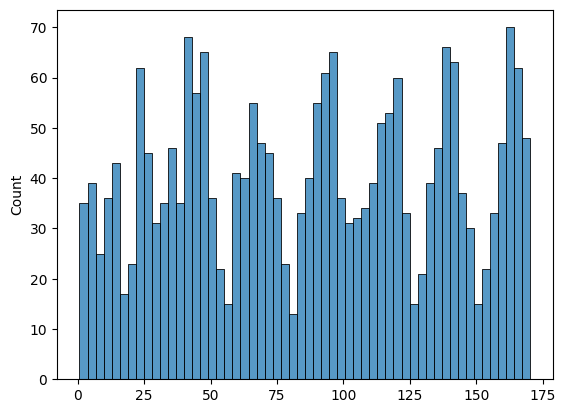

In [107]:
sns.histplot([inc.resolution_time for inc in simulation.cumulative_incidents], bins = 56)

In [106]:
7*24/3

56.0